## 자주 사용하는 pandas 연산 기능 함수 소개

In [48]:
import pandas as pd

In [49]:
df = pd.DataFrame({
    "가로" : [10, 20, 30, 10, 30, 20, 11],
    "세로" : [20, 23, 22, 33, 22, 12, 11],
    "높이" : [50, 40, 20, 50, 20, 30, 40]
})

df

,가로,세로,높이
0,10,20,50
1,20,23,40
2,30,22,20
3,10,33,50
4,30,22,20
5,20,12,30
6,11,11,40


sum : 합계

In [50]:
# sum 합계 계산 axis=0
df.sum(axis=0)

가로    131
세로    143
높이    250
dtype: int64

In [51]:
# sum 합계 계산 axis=1
df.sum(axis=1)

0    80
1    83
2    72
3    93
4    72
5    62
6    62
dtype: int64

divide : 나누기

In [52]:
df.divide(2)

,가로,세로,높이
0,5.0,10.0,25.0
1,10.0,11.5,20.0
2,15.0,11.0,10.0
3,5.0,16.5,25.0
4,15.0,11.0,10.0
5,10.0,6.0,15.0
6,5.5,5.5,20.0


In [ ]:
df

In [53]:
# sum과 함께 응용하자면.. 이런식으로도 사용 가능
df.divide(df.sum(axis=1), axis=0)

,가로,세로,높이
0,0.125000,0.250000,0.625000
1,0.240964,0.277108,0.481928
2,0.416667,0.305556,0.277778
3,0.107527,0.354839,0.537634
4,0.416667,0.305556,0.277778
5,0.322581,0.193548,0.483871
6,0.177419,0.177419,0.645161


누적 계산 (누적곱, 누적 최대,최소값)

In [ ]:
df

In [54]:
# cumprod 누적곱

df.cumprod(axis=0)

,가로,세로,높이
0,10,20,50
1,200,460,2000
2,6000,10120,40000
3,60000,333960,2000000
4,1800000,7347120,40000000
5,36000000,88165440,1200000000
6,396000000,969819840,48000000000


In [55]:
# cumprod 누적곱

df.cumprod(axis=1)

,가로,세로,높이
0,10,200,10000
1,20,460,18400
2,30,660,13200
3,10,330,16500
4,30,660,13200
5,20,240,7200
6,11,121,4840


In [ ]:
df

In [56]:
# cummax 누적 최댓값

df.cummax()

,가로,세로,높이
0,10,20,50
1,20,23,50
2,30,23,50
3,30,33,50
4,30,33,50
5,30,33,50
6,30,33,50


In [57]:
# cummax 누적 최댓값

df.cummax(axis=1)

,가로,세로,높이
0,10,20,50
1,20,23,40
2,30,30,30
3,10,33,50
4,30,30,30
5,20,20,30
6,11,11,40


## apply 함수

dataframe에 파이썬 함수를 적용할 수 있다

예를들어, 가로, 세로, 높이를 이용해 부피라는 컬럼을 추가해보자

In [58]:
df

,가로,세로,높이
0,10,20,50
1,20,23,40
2,30,22,20
3,10,33,50
4,30,22,20
5,20,12,30
6,11,11,40


In [61]:
def getVolume(row):
    if row['가로'] == 10:
        return row['가로'] * row['세로'] * row['높이']
    else:
        10

df['부피'] = df.apply(getVolume, axis=1)
df

,가로,세로,높이,부피
0,10,20,50,10000.0
1,20,23,40,NaN
2,30,22,20,NaN
3,10,33,50,16500.0
4,30,22,20,NaN
5,20,12,30,NaN
6,11,11,40,NaN


## concat 함수

서로 다른 두 개의 데이터 프레임을 합치는 기능

In [ ]:
df

In [62]:
df2 = pd.DataFrame({
    "가로" : [10, 20, 30, 10, 30, 20, 11],
    "세로" : [20, 23, 22, 33, 22, 12, 11],
    "높이" : [50, 40, 20, 50, 20, 30, 40]
})

df2

,가로,세로,높이
0,10,20,50
1,20,23,40
2,30,22,20
3,10,33,50
4,30,22,20
5,20,12,30
6,11,11,40


In [63]:
pd.concat([df, df2], axis=0)

,가로,세로,높이,부피
0,10,20,50,10000.0
1,20,23,40,NaN
2,30,22,20,NaN
3,10,33,50,16500.0
4,30,22,20,NaN
5,20,12,30,NaN
6,11,11,40,NaN
0,10,20,50,NaN
1,20,23,40,NaN
2,30,22,20,NaN


In [64]:
pd.concat([df, df2], axis=1)

,가로,세로,높이,부피,가로,세로,높이
0,10,20,50,10000.0,10,20,50
1,20,23,40,NaN,20,23,40
2,30,22,20,NaN,30,22,20
3,10,33,50,16500.0,10,33,50
4,30,22,20,NaN,30,22,20
5,20,12,30,NaN,20,12,30
6,11,11,40,NaN,11,11,40


## 중복 데이터 처리

중복 데이터 찾기 : duplicated

In [67]:
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [66]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [70]:
# keep이라는 속성을 사용하여 어떤 값을 중복으로 인식할 것인지 설정, 기본값은 first
df.duplicated(keep="last")

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [71]:
# subset 속성을 사용하여 특정 컬럼에 대한 중복만 처리 가능
df.duplicated(subset=['brand', 'style'])

0    False
1     True
2    False
3    False
4     True
dtype: bool

중복값 삭제 : drop_duplicates

In [74]:
df.drop_duplicates()

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [79]:
df

,brand,style,rating
0,Yum Yum,cup,4.0
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0
4,Indomie,pack,5.0


In [78]:
df.drop_duplicates(subset=['brand', 'style'], keep='first')

,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0


In [77]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,Yum Yum,cup,4.0
2,Indomie,cup,3.5
4,Indomie,pack,5.0


## 결측(빈) 데이터 처리

isnull (isna) : 결측치 찾기

In [80]:
import numpy as np

In [86]:
df = pd.DataFrame([[1, 5, 2], [np.nan, 1, 3], [6, np.nan, np.nan], [2, 5, np.nan], [2, 5, 2]])
df

,0,1,2
0,1.0,5.0,2.0
1,NaN,1.0,3.0
2,6.0,NaN,NaN
3,2.0,5.0,NaN
4,2.0,5.0,2.0


In [82]:
df.isna()

,0,1,2
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [83]:
df.isnull()

,0,1,2
0,False,False,False
1,True,False,False
2,False,True,False
3,False,False,True
4,False,False,False


In [89]:
df.isna().sum()

0    1
1    1
2    2
dtype: int64

fillna : 결측치 채우기

In [93]:
df

,0,1,2
0,1.0,5.0,2.0
1,NaN,1.0,3.0
2,6.0,NaN,NaN
3,2.0,5.0,NaN
4,2.0,5.0,2.0


In [91]:
df.fillna(1) # 특정 값으로 채우기

,0,1,2
0,1.0,5.0,2.0
1,1.0,1.0,3.0
2,6.0,1.0,1.0
3,2.0,5.0,1.0
4,2.0,5.0,2.0


In [94]:
df.fillna(method="ffill") # 특정 값으로 채우기 ffill = forward fill 앞에 값으로 대체

,0,1,2
0,1.0,5.0,2.0
1,1.0,1.0,3.0
2,6.0,1.0,3.0
3,2.0,5.0,3.0
4,2.0,5.0,2.0


In [95]:
df.fillna(method="bfill") # 특정 값으로 채우기 bfill = backward fill 뒤에 값으로 대체

,0,1,2
0,1.0,5.0,2.0
1,6.0,1.0,3.0
2,6.0,5.0,2.0
3,2.0,5.0,2.0
4,2.0,5.0,2.0


dropna : 결측치 삭제

In [96]:
df = pd.DataFrame([[1, 5, 2], [np.nan, 1, 3], [6, np.nan, 20], [2, 5, np.nan], [2, 5, 2]])
df

,0,1,2
0,1.0,5.0,2.0
1,NaN,1.0,3.0
2,6.0,NaN,20.0
3,2.0,5.0,NaN
4,2.0,5.0,2.0


In [97]:
df.dropna()

,0,1,2
0,1.0,5.0,2.0
4,2.0,5.0,2.0


## 시각화

matplotlib을 사용하여 기본적인 그래프를 만들 수 있다.

* 라인 플롯(line plot)
* 스캐터 플롯(scatter plot)
* 컨투어 플롯(contour plot)
* 서피스 플롯(surface plot)
* 바 차트(bar chart)
* 히스토그램(histogram)
* 박스 플롯(box plot)

등 다양한 그래프를 만들 수 있는데,

사실 사용법은 필요에 따라 검색해서 그때 그때 익히면 된다.  
여기서는 라인 플롯을 기준으로 그래프 사이즈, 레이블 설정 등 기본적인 사용법을 위주로 살펴본다.

In [98]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
import matplotlib.pyplot as plt

In [101]:
sample = pd.read_csv("내국인 생활인구.csv", encoding="cp949")
sample.head()

,일자(stdr_de_id),시간(tmzon_pd_se),행정동코드(adstrd_code_se),집계구코드(oa_cd),생활인구합계(tot_lvpop_co),남자0~9세(male_f0t9_lvpop_co),남자10~14세(male_f10t14_lvpop_co),남자15~19세(male_f15t19_lvpop_co),남자20~24세(male_f20t24_lvpop_co),남자25~29세(male_f25t29_lvpop_co),...,여자40~44세(female_f40t44_lvpop_co),여자45~49세(female_f45t49_lvpop_co),여자50~54세(female_f50t54_lvpop_co),여자55~59세(female_f55t59_lvpop_co),여자60~64세(female_f60t64_lvpop_co),여자65~69세(female_f65t69_lvpop_co),여자70~74세(female_f70t74_lvpop_co),여자75~79세(female_f75t79_lvpop_co),여자80세이상(female_above_80_lvpop_co),등록일자(ldadng_dt)
0,20170226,4,11320515,1125061020007,4.3097,11.9781,8.2257,1.8759,4.2075,6.2647,...,9.0816,52.6711,24.9152,3.6202,91.3448,13.6818,45.2880,2.3141,9.7668,2021-08-17 16:06:44
1,20180107,22,11380510,1115071010309,338.3900,23.2446,3.1141,1.9972,2.6983,0.1240,...,10.0707,9.9150,14.6710,29.2192,0.1533,36.7707,0.9227,4.6111,18.1781,2021-08-17 16:06:44
2,20180317,6,11680610,1113073020101,1805.5256,4.3720,324.3596,10.8350,12.1324,20.4938,...,28.8794,19.4895,1.6087,16.2525,8.1640,34.3989,3.4030,3.8434,4.4772,2021-08-17 16:06:44
3,20190222,7,11305575,1106071020403,504.4956,14.0599,14.3256,3.5239,19.3154,6.8197,...,0.2650,36.5731,14.3217,35.7359,7.2808,6.9919,27.4321,1.8361,7.7510,2021-08-17 16:06:44
4,20210706,6,11740660,1107073040015,744.6219,0.5662,2.9824,2.9719,31.0868,7.2338,...,39.7471,1.5230,47.5514,63.4768,52.3638,35.3496,32.1275,85.6665,95.0249,2021-08-17 16:06:44


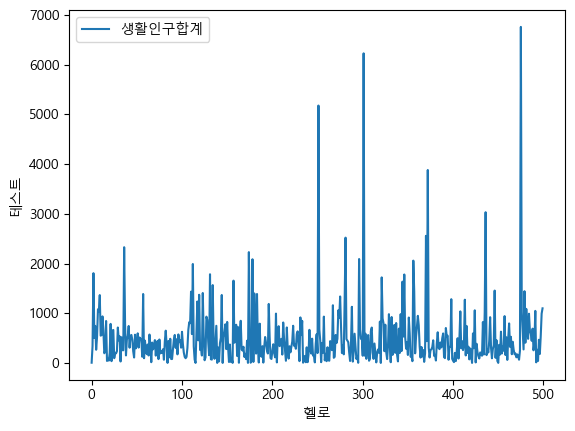

In [104]:
# 윈도우
plt.rc('font', family='Malgun Gothic')

# 맥
# plt.rc('font', family='AppleGothic')

sample['생활인구합계(tot_lvpop_co)'].plot(label="생활인구합계", xlabel="헬로", ylabel="테스트")
plt.legend()

### 그래프 사이즈 조절

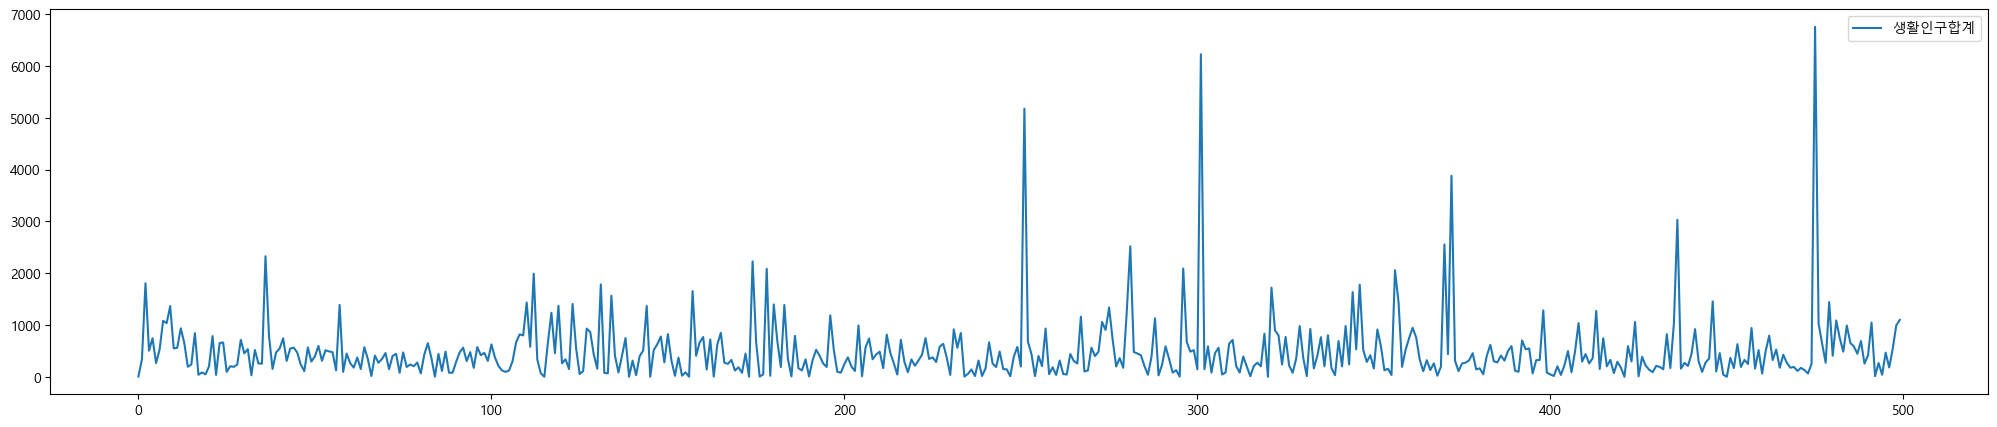

In [107]:
plt.figure(figsize=(25,5))
sample['생활인구합계(tot_lvpop_co)'].plot(label="생활인구합계")
plt.legend()

### 여러개 그래프를 한번에

ValueError: too many values to unpack (expected 2)

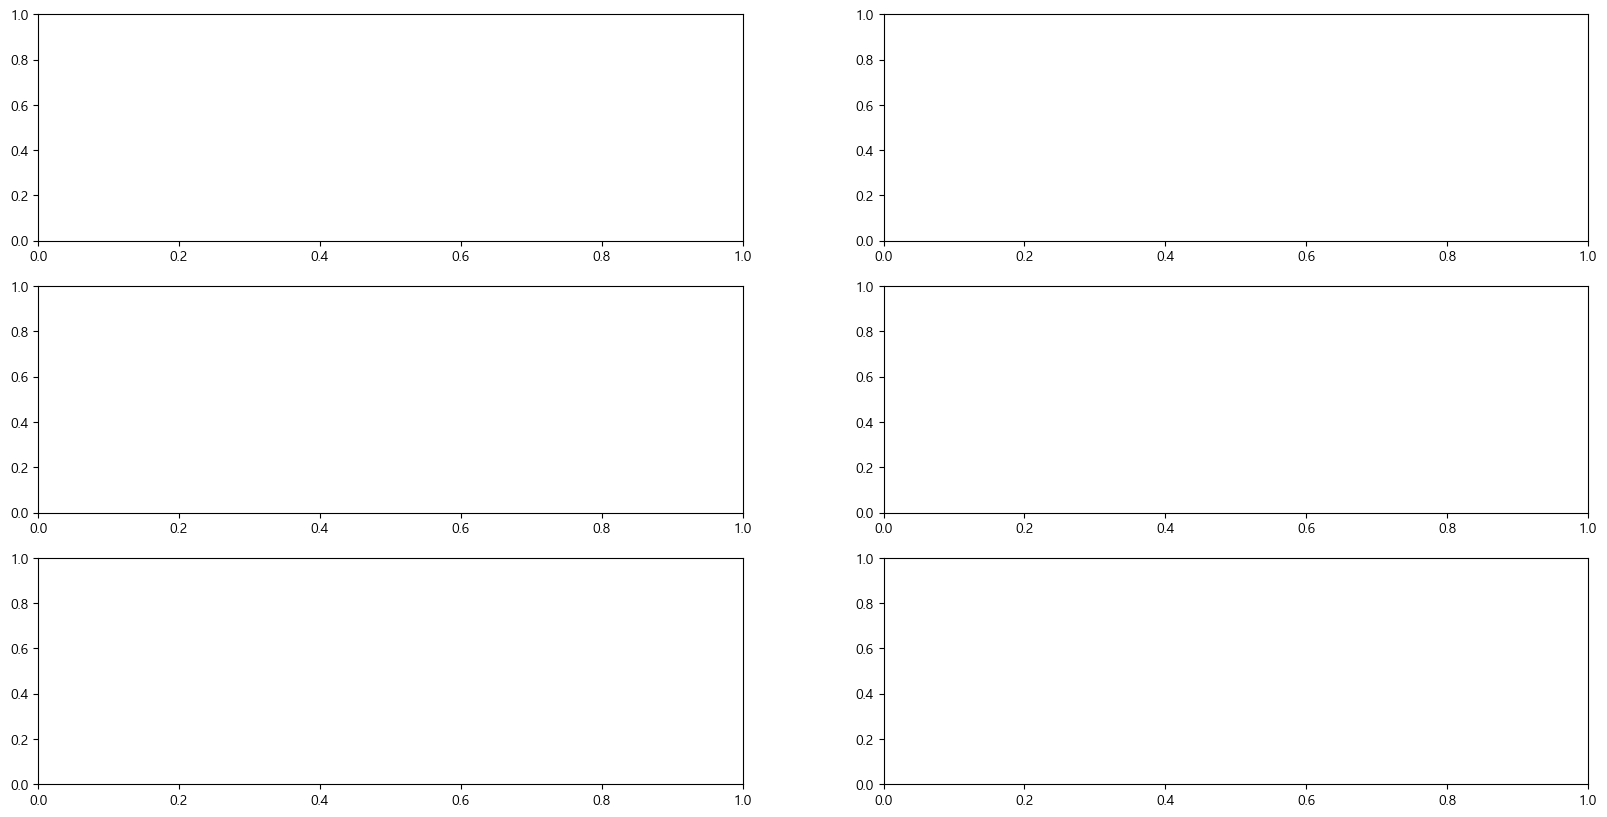

In [109]:
figure , (ax1, ax2) = plt.subplots(nrows=3, ncols=2, figsize=(20,10))

<Axes: xlabel='남자 0-9세'>

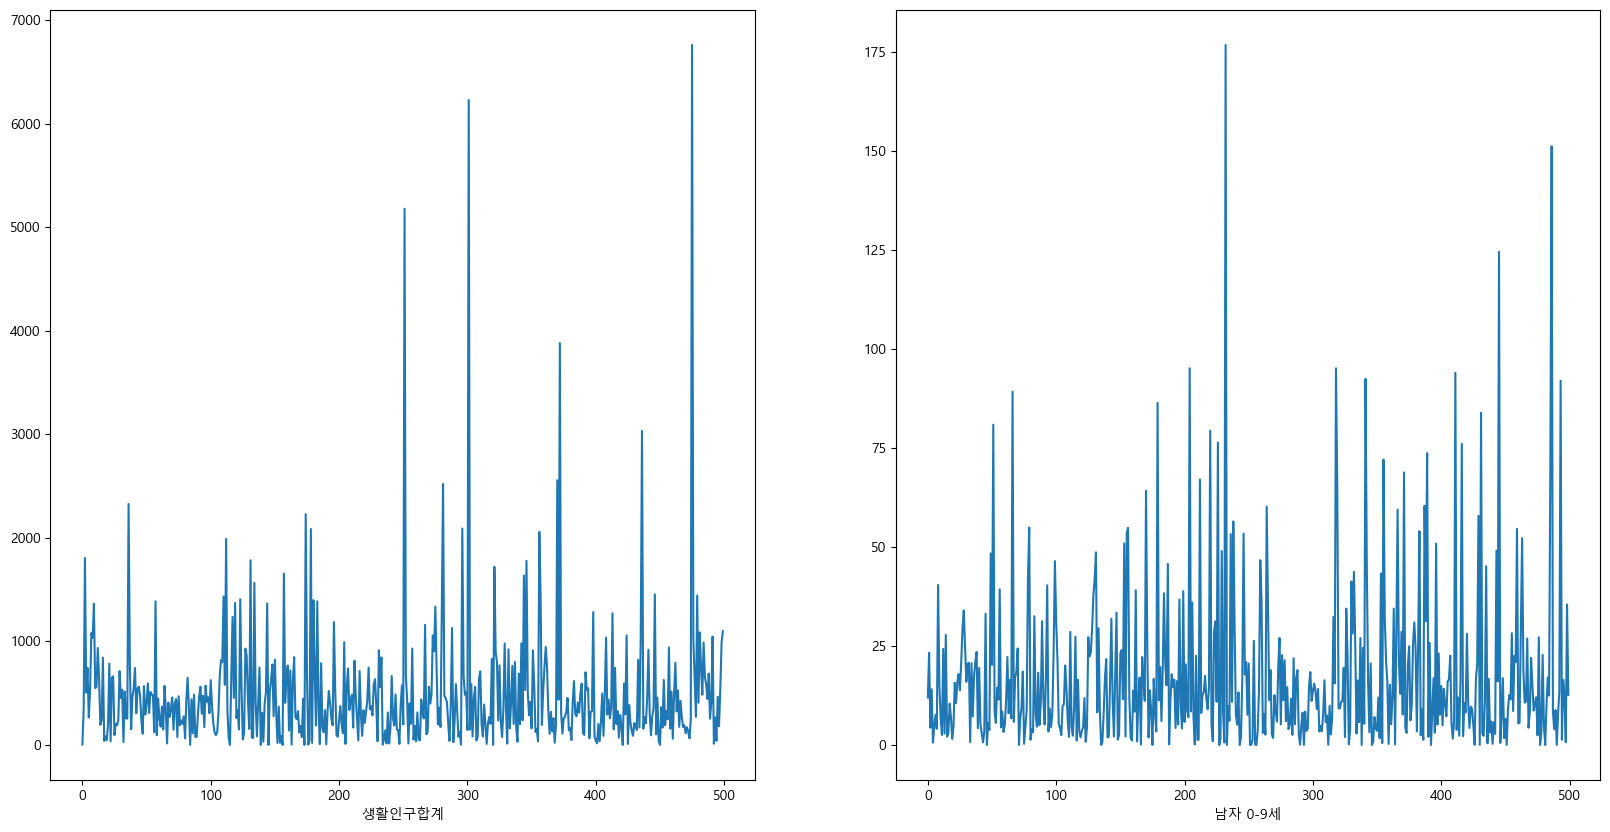

In [110]:
figure , (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sample['생활인구합계(tot_lvpop_co)'].plot(ax=ax1, label="total", xlabel="생활인구합계")
sample['남자0~9세(male_f0t9_lvpop_co)'].plot(ax=ax2, label="man 0-9", xlabel="남자 0-9세")